In [155]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import seaborn as sns
from sklearn import  metrics
from sklearn import preprocessing

In [0]:
data = pd.read_csv('diabetes.csv')

In [0]:
one_data = data[data['Outcome'] == 1]

In [0]:
data = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]

In [0]:
total_data = []
total_data.append(zero_data[0:267])

In [0]:
df = pd.DataFrame(zero_data[0:267])

In [0]:
df = df.append(one_data)

In [95]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


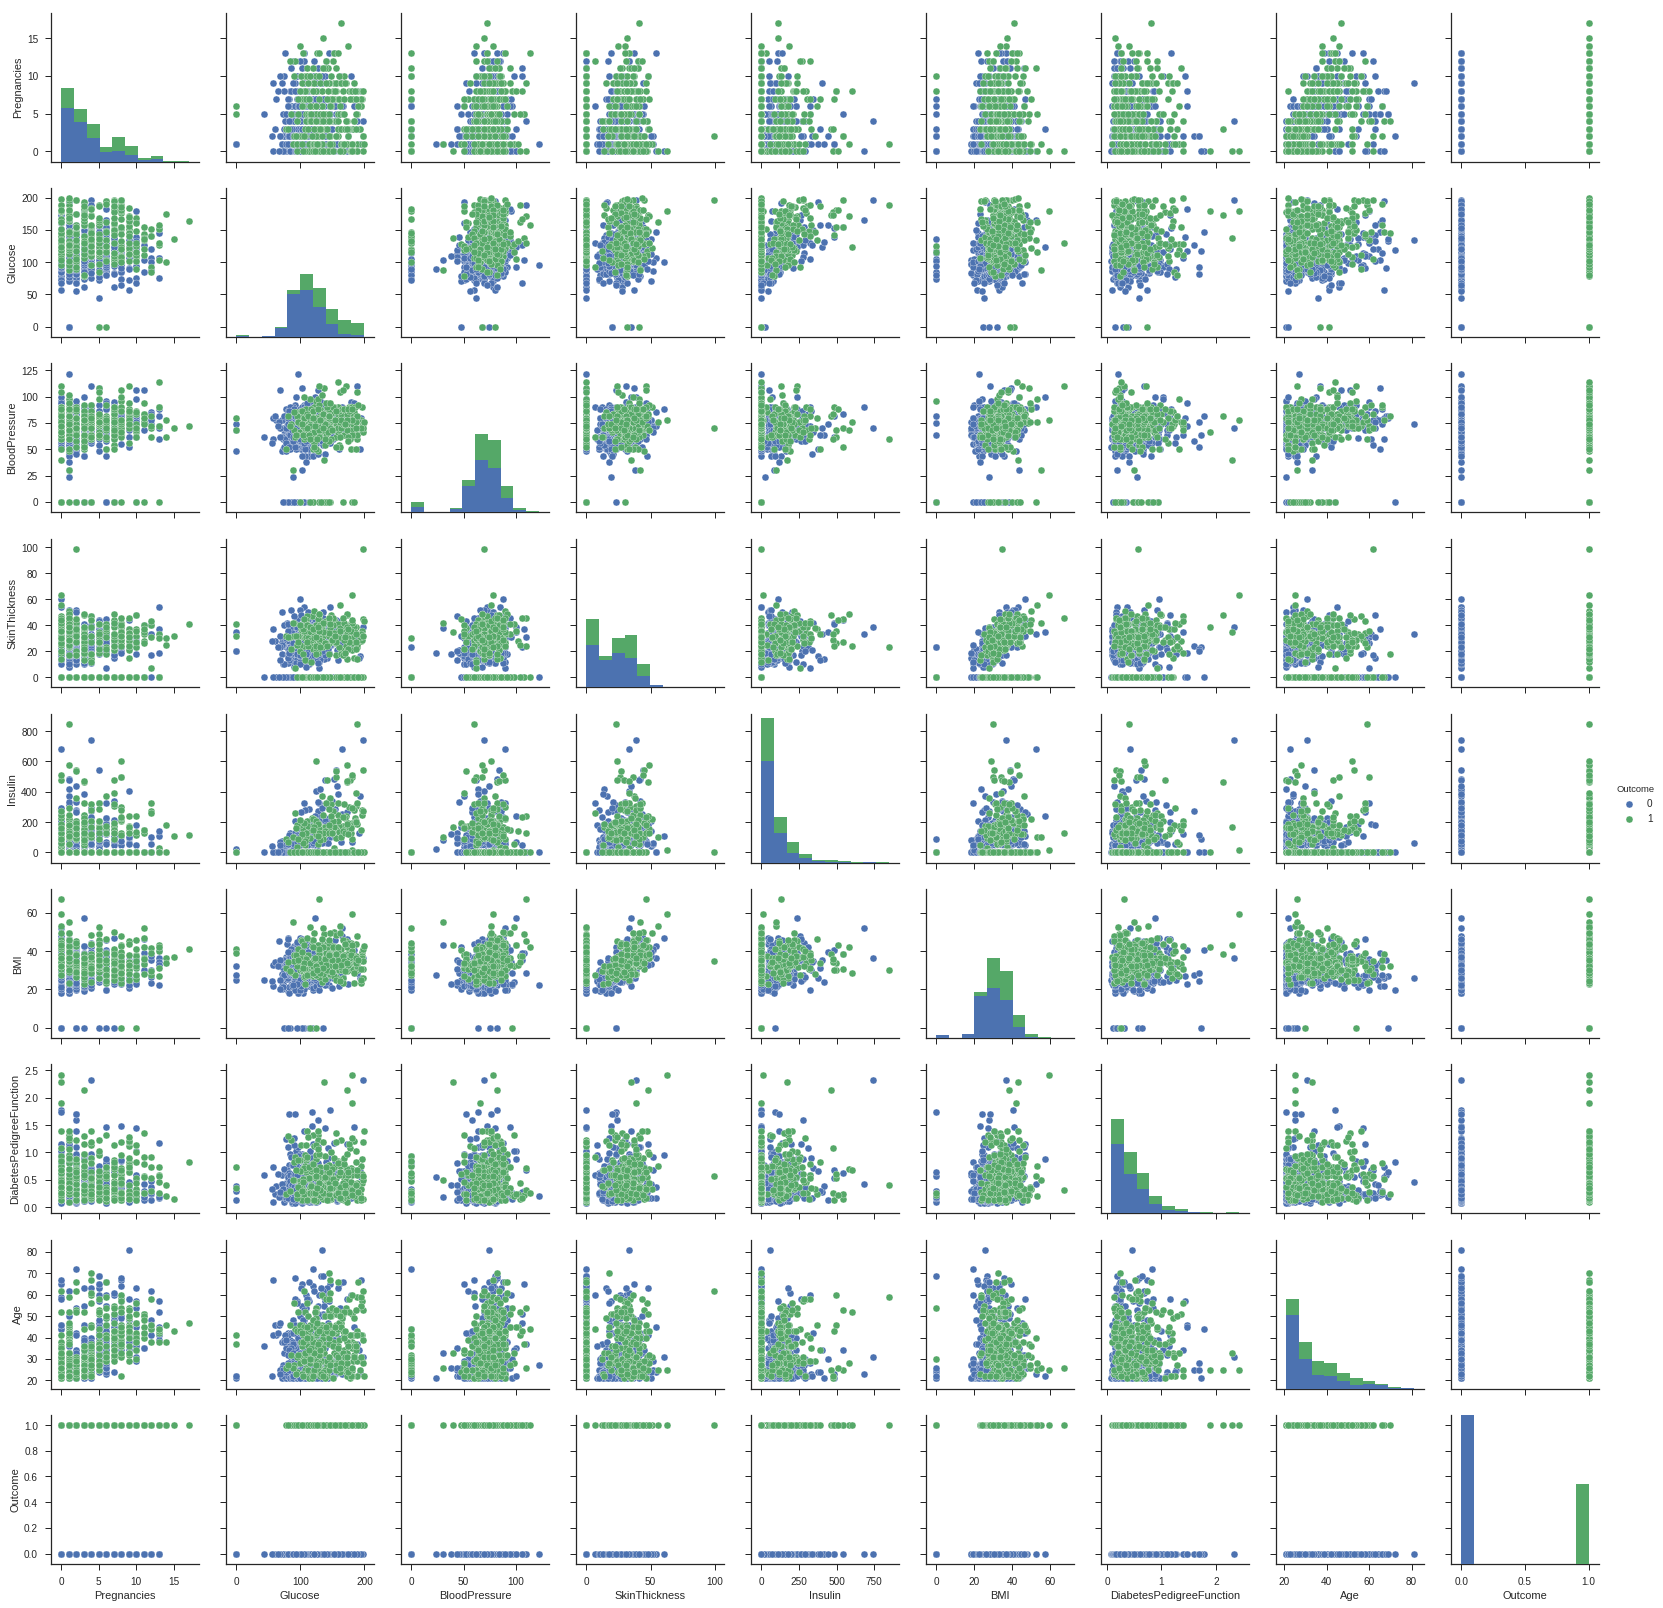

In [7]:
sns.set(style = 'ticks')
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Outcome')

In [0]:
labels = data.iloc[:,-1]

In [0]:
labels.tolist()

In [0]:
data.drop(data.columns[len(data.columns)-1], axis=1, inplace=True)

In [0]:
train_data, test_data, train_value, test_value = train_test_split(data,labels, test_size = 0.2, random_state=42)

In [0]:
train_data =  preprocessing.normalize(train_data, axis=0)
test_data =  preprocessing.normalize(test_data, axis=0)

In [172]:
print(train_data.shape, test_data.shape, train_value.shape, test_value.shape)

(579, 8) (145, 8) (579,) (145,)


In [0]:
from sklearn import linear_model
lin_reg_model = linear_model.LinearRegression()

In [174]:
lin_reg_model.fit(train_data,train_value)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
predictions = lin_reg_model.predict(test_data)

In [0]:
output = []
for i in range(len(predictions)):
  if predictions[i]>=0.5:
    output.append(1)
  else:
    output.append(0)

In [0]:
y = test_value.tolist()

In [178]:
count = 0
for i in range(len(output)):
  if output[i] == y[i]:
    count = count+ 1
accuracy = float(count/len(output))
print (accuracy)

0.296551724137931


In [0]:
from sklearn import linear_model as lm
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as knnc
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, confusion_matrix


In [0]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'\
            , 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [0]:
df[target]

In [133]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, df[features], df[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')

K nearest neighbors  mean accuracy:  68.217 % std:  0.149 %
Decision Tree Classifier  mean accuracy:  68.228 % std:  0.392 %
SVM classifier with RBF kernel  mean accuracy:  50.464 % std:  0.012 %
SVM classifier with linear kernel  mean accuracy:  71.038 % std:  0.134 %
Gaussian Naive Bayes  mean accuracy:  71.788 % std:  0.026 %


In [0]:
gnb_model = gnb().fit( df[features], df[target])
output_gnb = gnb_model.predict(one_data[features])

In [146]:
print('accuracy', round(accuracy_score(one_data[target], output_gnb)*100, 2))

accuracy 69.03


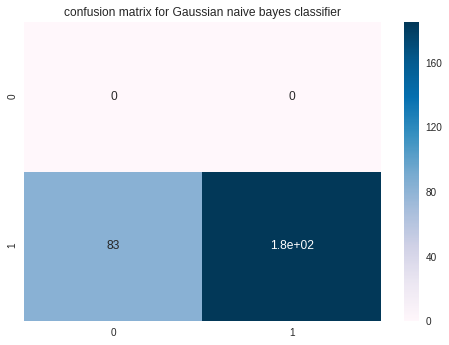

In [148]:
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(one_data[target], output_gnb), annot=True, cmap="PuBu")
plt.show()

In [158]:
data_mod = data[(data.BloodPressure != 0) & (data.BMI != 0) & (data.Glucose != 0)]
train, test = train_test_split(data_mod, test_size=0.2)
print(data_mod.shape)
print(train.shape)
print(test.shape)

(724, 9)
(579, 9)
(145, 9)


In [0]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'\
            , 'BMI', 'Age', 'Insulin', 'DiabetesPedigreeFunction']
target = 'Outcome'
classifiers = [
    knnc(),
    dtc(),
    SVC(),
    SVC(kernel='linear'),
    gnb()
]
classifier_names = [
    'K nearest neighbors',
    'Decision Tree Classifier',
    'SVM classifier with RBF kernel',
    'SVM classifier with linear kernel',
    'Gaussian Naive Bayes'
]

In [160]:
for clf, clf_name in zip(classifiers, classifier_names):
    cv_scores = cross_val_score(clf, train[features], train[target], cv=5)
    
    print(clf_name, ' mean accuracy: ', round(cv_scores.mean()*100, 3), '% std: ', round(cv_scores.var()*100, 3),'%')


K nearest neighbors  mean accuracy:  72.363 % std:  0.035 %
Decision Tree Classifier  mean accuracy:  68.564 % std:  0.015 %
SVM classifier with RBF kernel  mean accuracy:  64.594 % std:  0.0 %
SVM classifier with linear kernel  mean accuracy:  75.645 % std:  0.122 %
Gaussian Naive Bayes  mean accuracy:  73.75 % std:  0.108 %


In [0]:
final_model_smv_lin = SVC(kernel='linear').fit(train[features], train[target])
final_model_gnb = gnb().fit(train[features], train[target])

test accuracy for SVM classifier with a linear kernel: 80.69 %


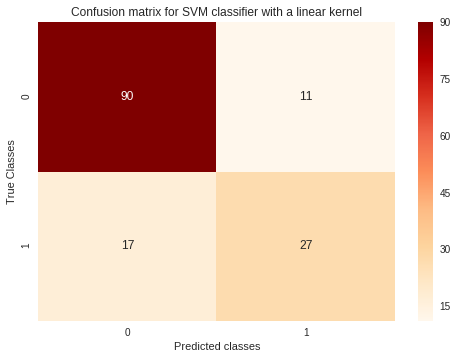

test accuracy for Gaussian naive bayes classifier: 83.45 %


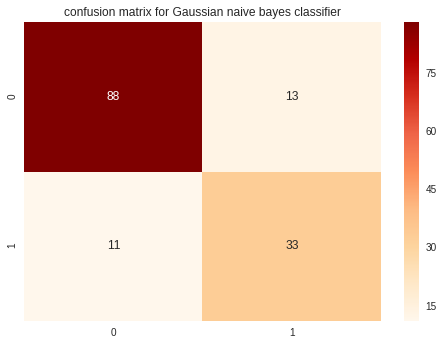

In [179]:
y_hat_svm = final_model_smv_lin.predict(test[features])
y_hat_gnb = final_model_gnb.predict(test[features])

print('test accuracy for SVM classifier with a linear kernel:'\
      , round(accuracy_score(test[target], y_hat_svm)*100, 2), '%')
plt.title('Confusion matrix for SVM classifier with a linear kernel')
sns.heatmap(confusion_matrix(test[target], y_hat_svm), annot=True, cmap="OrRd")
plt.xlabel('Predicted classes')
plt.ylabel('True Classes')
plt.show()

print('test accuracy for Gaussian naive bayes classifier:', \
      round(accuracy_score(test[target], y_hat_gnb)*100, 2),'%')
plt.title('confusion matrix for Gaussian naive bayes classifier')
sns.heatmap(confusion_matrix(test[target], y_hat_gnb), annot=True, cmap="OrRd")
plt.show()